# Multipoles

The field of a single point charge is relatively simple — as far as three-dimensional vector fields go.  What happens as we put more charges together?

Let's use Python to find out.

In [1]:
# Import useful functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Turn on interactive plots.
# %matplotlib notebook

# Turn off interactive plots.
%matplotlib inline

We can use the functions in the `visualizing-fields` notebook.

In [3]:
# Define functions to calculate and plot fields.
def coordinates(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    
    return X, Y, Z

def potential(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    V = q/R
    
    return V

def field(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    Ez = q*(Z-z0)/R**3
    
    return Ex, Ey, Ez

def draw_field(x,y,z,u,v,w, stride=25):
    """
    Takes coordinate arrays x,y,z and vector field component
    arrays u,v,w and draws a quiver plot where all of the arrows
    have the same length.
    """
    # Create a quiver plot.
    # Use a coarser grid.
    x = X[::stride,::stride,::stride].copy()
    y = Y[::stride,::stride,::stride].copy()
    z = Z[::stride,::stride,::stride].copy()
    ex = Ex[::stride,::stride,::stride].copy()
    ey = Ey[::stride,::stride,::stride].copy()
    ez = Ez[::stride,::stride,::stride].copy()
    
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(projection='3d')
    ax.quiver3D(x,y,z,ex,ey,ez, pivot='middle', length=0.7, normalize=True, linewidth=0.5, color='red')
    ax.set_title(r"$\vec{E}(\vec{R})$")

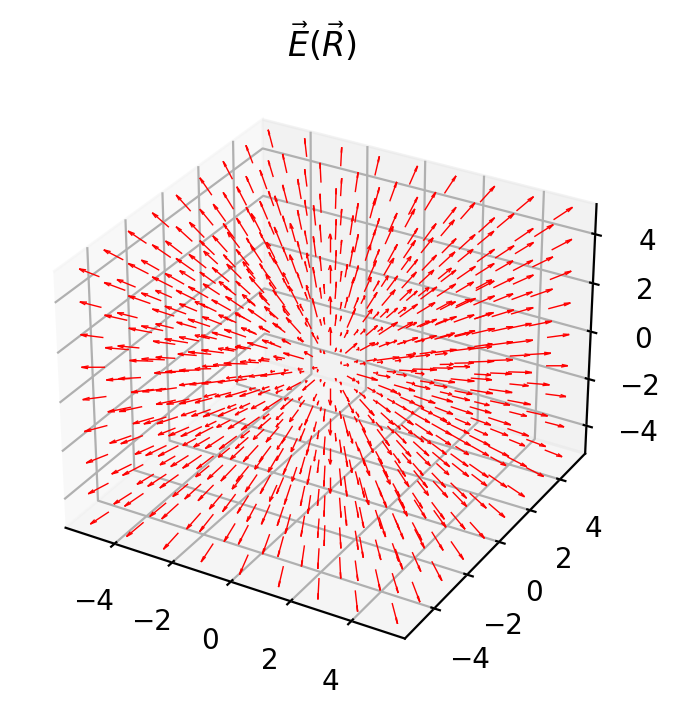

In [4]:
# Draw the field of a point charge at the origin for reference.
X,Y,Z = coordinates()
Ex, Ey, Ez = field()
draw_field(X,Y,Z, Ex,Ey,Ez)

The functions don't require any arguments, but you can supply them to change the behavior.  Let's look at the field of two point charges separated by "2 units".  (We'll talk about units later ...)

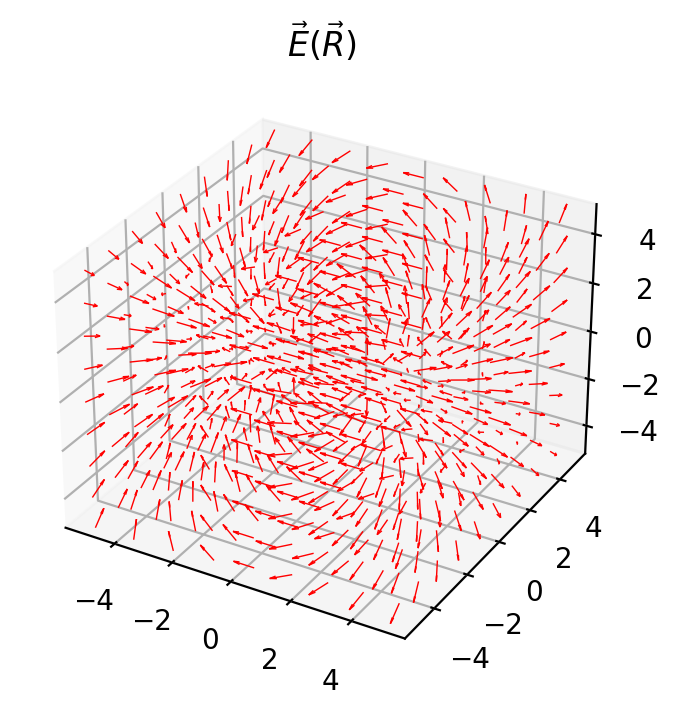

In [7]:
# Charge 1
q1 = +1
x1 = +1
y1 = 0
z1 = 0

# Charge 2
q2 = -1
x2 = -1
y2 = 0
z2 = 0

# Combute combined potential.
V1 = potential(q1, (x1,y1,z1))
V2 = potential(q2, (x2,y2,z2))

# Compute combined field.
E1 = np.stack(field(q1, (x1,y1,z1)))
E2 = np.stack(field(q2, (x2,y2,z2)))

Ex, Ey, Ez = E1 + E2

draw_field(X,Y,Z, Ex, Ey,Ez)

Describe the pattern.  How is it similar to what you observed with a single point charge?  Are there any significant difference?

The patterns seem inherently the same, except when there are two charges, the origin is a little messy, like the field is not aligned, and after a certain distance, their differences are coutneracted and they align. Secondarily, the overal field shifts a tiny bit - with a single pt charge, the vectors are aligned more on the right and spaced from each other more on the left, but w two pt charges, the arrows align on the left but are more spaced on the right (it doesn't seem relevant though - is it?)

Change the value of `q2` above to `-1` and replot.  What changes?  How is it similar to what you observed with a single point charge?  Are there any significant difference? 

When q2 becomes (-) the field becomes a spiral. However, along the center axis where the two pt charges align, the field runs in a straight line, and you can slightly see there are two origins, instead of one. I'm guessing this spiral form happens because the charges are opposite, so they attract each other.
When I changed both q1 and q2 the field points in instead of out, but in exactly the same pattern as before, and as the single pt charge. I see all the same similarities - the origin is still slightly messy, but it corrects itself. I'm guessing 

# Dipoles and Quadrupoles

A point charge creates a "monopole" field pattern.  The pattern you just observed is called a "dipole" field.  There are "quadrupoles" and "octupoles" and "hexadecapoles" ... and more.  The patterns can be difficult to interpret in three dimensions, so we will focus our attention on a 2D slice through the plane where the charges are located.

Let's look at the dipole again.

In [8]:
# Turn off interactive plotting for now.
%matplotlib inline

In [9]:
# Define functions to calculate and plot fields.
def coordinates_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    
    return X, Y

def potential_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + epsilon**2)
    V = q/R
    
    return V

def field_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    
    return Ex, Ey

def draw_field_2d(X,Y,U,V, stride=10):
    """
    Takes coordinate arrays x,y,z and vector field component
    arrays u,v,w and draws a quiver plot where all of the arrows
    have the same length.
    """
    # Create a quiver plot.
    # Use a coarser grid.
    x = X[::stride,::stride].copy()
    y = Y[::stride,::stride].copy()
    u = U[::stride,::stride].copy()
    v = V[::stride,::stride].copy()
    
    # Make all arrows the same length.
    w = np.sqrt(u**2 + v**2 + 1e-6)
    u /= w
    v /= w
    
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot()
    ax.quiver(x,y,u,v, pivot='middle', linewidth=0.5, color='green', minlength=1)
    ax.set_title(r"$\vec{E}(\vec{R})$")
    ax.axis('equal')

Let's look at the field of a point charge located at the origin in this representation.

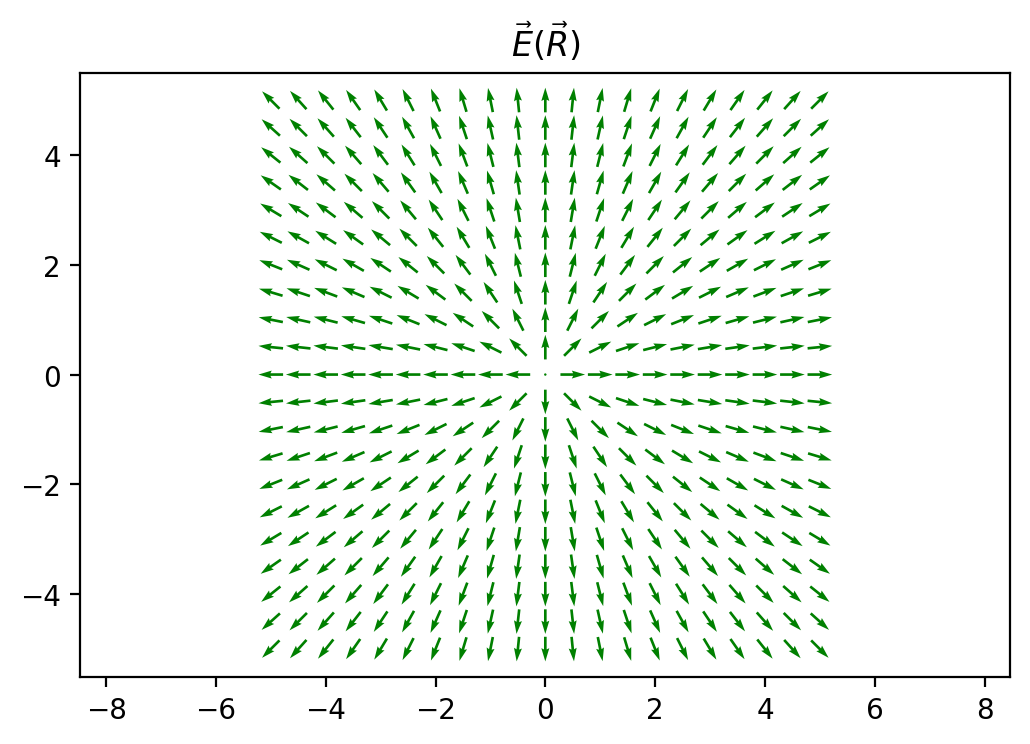

In [10]:
X,Y = coordinates_2d()
Ex,Ey = field_2d()
draw_field_2d(X,Y,Ex,Ey)

## Dipole

Change the values and locations of the charges below.

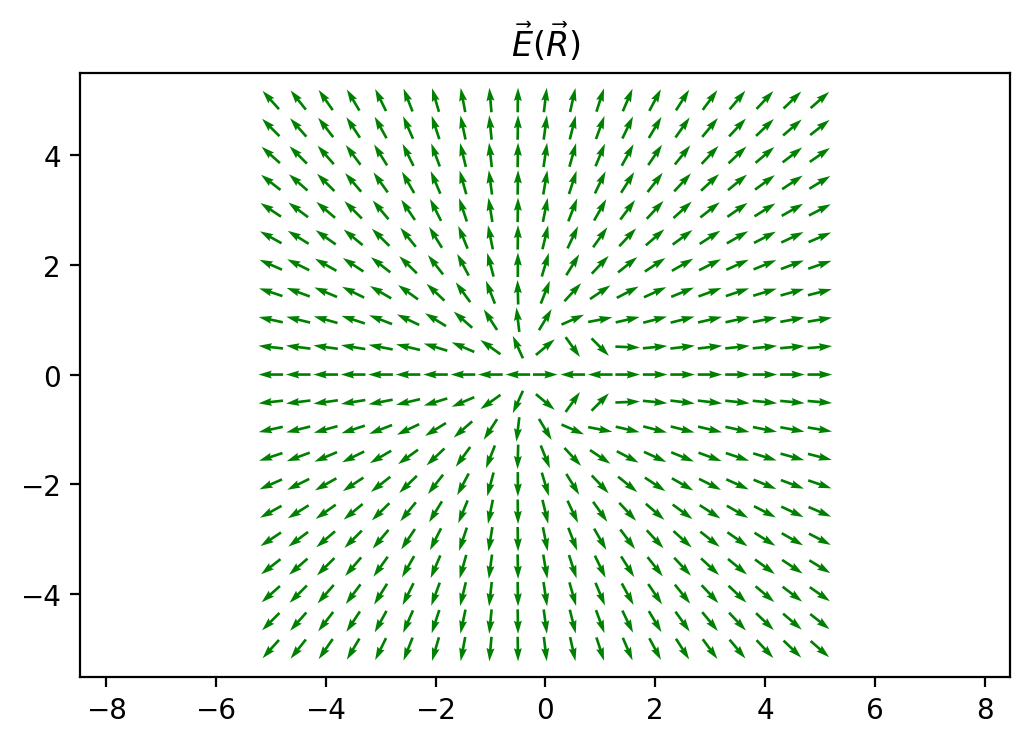

In [30]:
q1 = -1
x1 = +0.2
y1 = 0

q2 = +2
x2 = -0.2
y2 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2)))
draw_field_2d(X,Y,Ex,Ey)

What patterns or trends do you notice when the charges have the same sign?  What happens near the charges?  What happens farther away?

When the charges have the same sign the field points all in the same direction: (-1 and -2) causes the field to point inward, (+1 and +2) causes it to point outward. Because q2 > q1 what appears to be the origin is not centered; it looks like one charge, except there is slightly more field point away from q2 than q1. This is made more clear when setting q2 = q1 which centers the origin as if it were a pt charge.
Regardless, by the time you get 2 units out, it doesn't really matter. 

What patterns or trends do you notice when the charges have the opposite sign and different magnitudes?  What happens near the charges?  What happens farther away?

From farther away from the pts, it looks the same when the charges have the opposite sign and different magnitudes, but at the center, there is a slight change causing the field to go aroudn rather than straight out within about 1 unit. 
Also, the net field points in the direction of the larger magnitude charge - negative points in positive points out.

What patterns or trends do you notice when the charges have the opposite sign and equal magnitudes?  What happens near the charges?  What happens farther away?

When the charges are opposite and equal, there is still a straigth E line down the center, but there is also now a curved field around the two points (induced dipole (?)). while the field is not all in the same direction, there seems to be a net E point along with the direction of the charge that is positive. The net result is seen more clearly from farther away as the field is dispersed; at the origin, the points are more fully enveloped by the field

## Quadrupole

The field created by two charges of equal magnitude and opposite sign that are very close together is called a ***dipole***.

We can combine two dipoles to make a new kind of patterns.  Try the following.

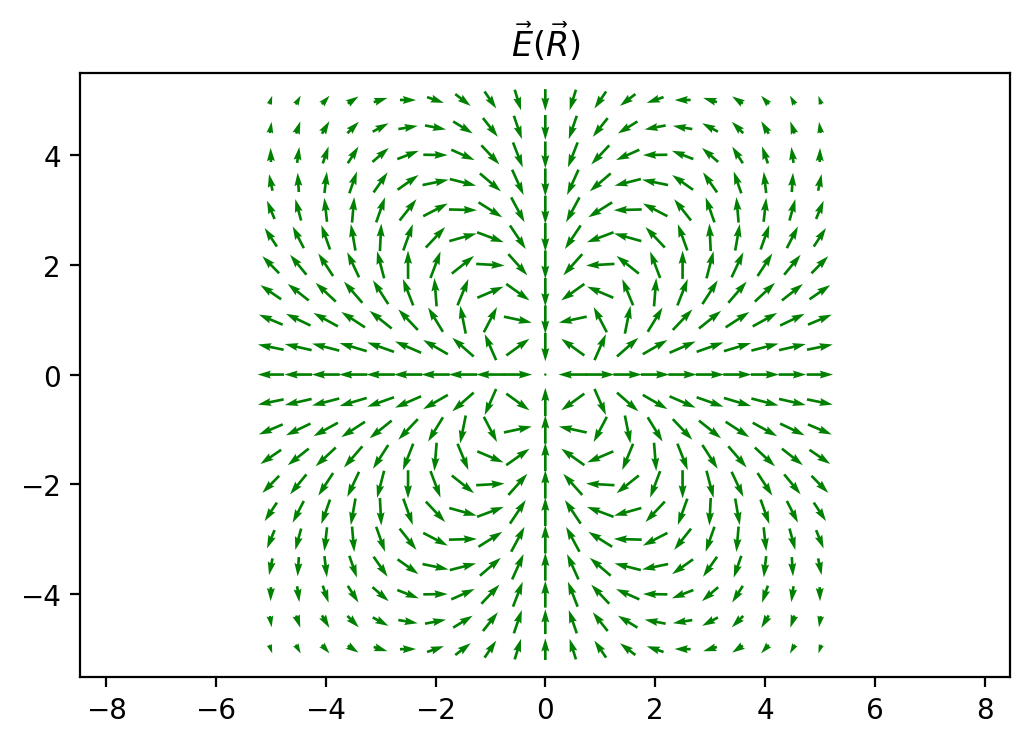

In [31]:
# (A) Two dipoles, pointing directly at each other.
q1 = +1
x1 = +0.5
y1 = 0

q2 = -2.0
x2 = 0
y2 = 0

q3 = +1
x3 = -0.5
y3 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) + np.stack(field_2d(q3, (x3,y3)))
draw_field_2d(X,Y,Ex,Ey)

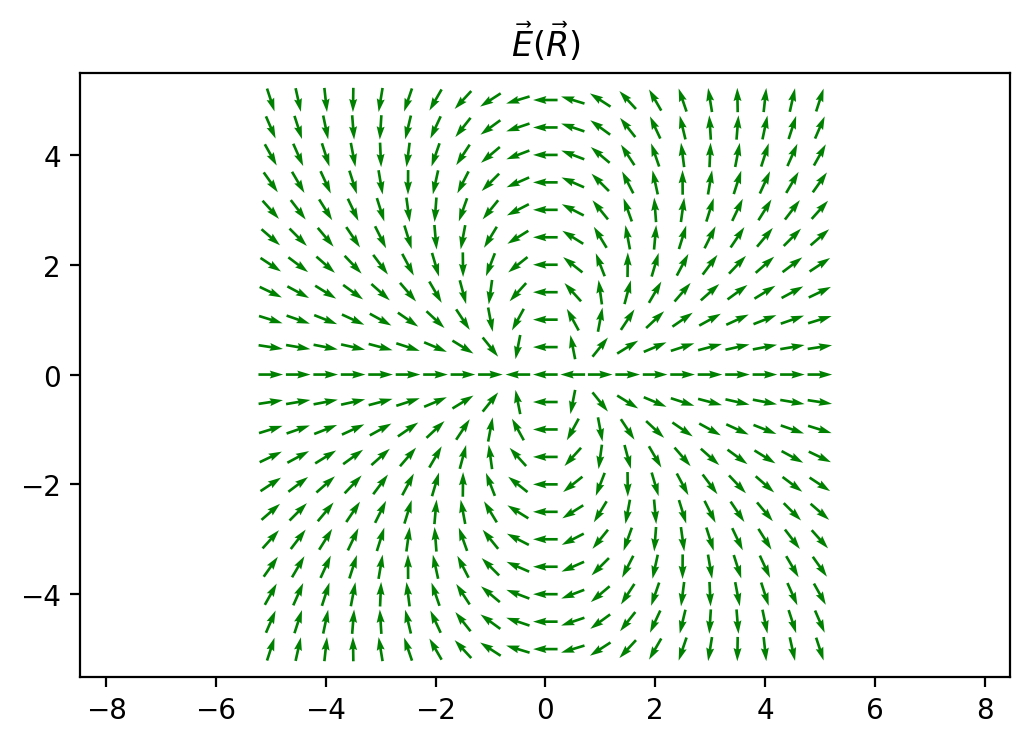

In [32]:
# (B) Two dipoles, end to end.
q1 = +1
x1 = +0.5
y1 = 0

q2 = 0
x2 = 0
y2 = 0

q3 = -1
x3 = -0.5
y3 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) + np.stack(field_2d(q3, (x3,y3)))
draw_field_2d(X,Y,Ex,Ey)

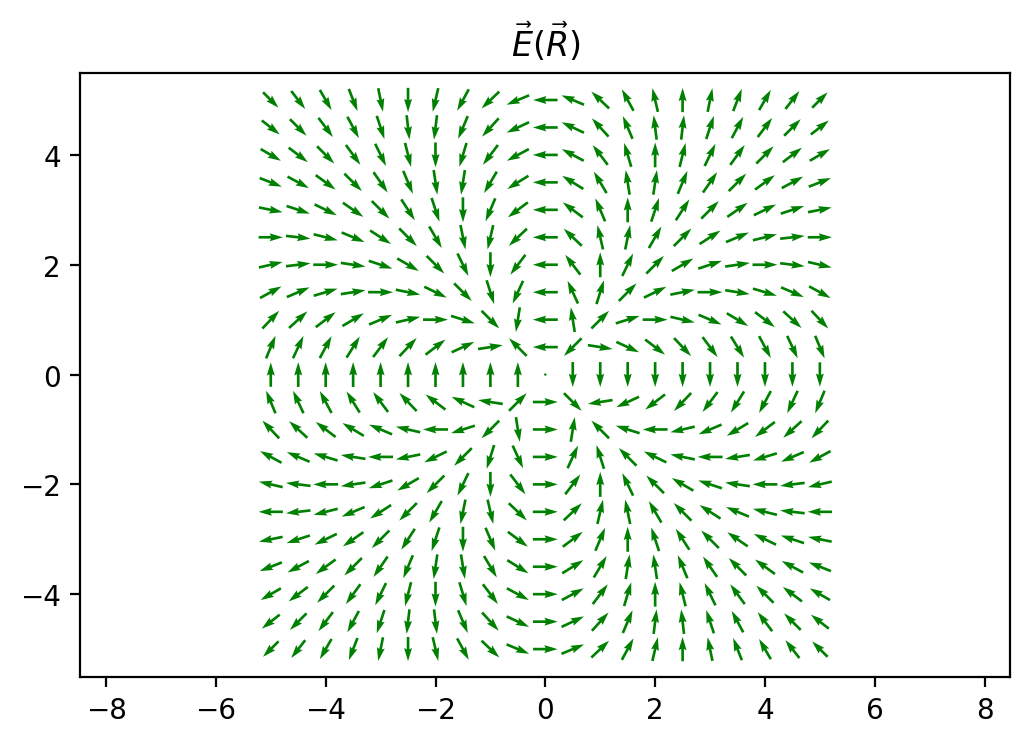

In [33]:
# (C) Two dipoles, pointing in opposite directions, but separated.
q1 = +1
x1 = +0.5
y1 = +0.5

q2 = -1
x2 = +0.5
y2 = -0.5

q3 = -1
x3 = -0.5
y3 = +0.5

q4 = +1
x4 = -0.5
y4 = -0.5

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) \
        + np.stack(field_2d(q3, (x3,y3))) + np.stack(field_2d(q4, (x4,y4)))
draw_field_2d(X,Y,Ex,Ey)

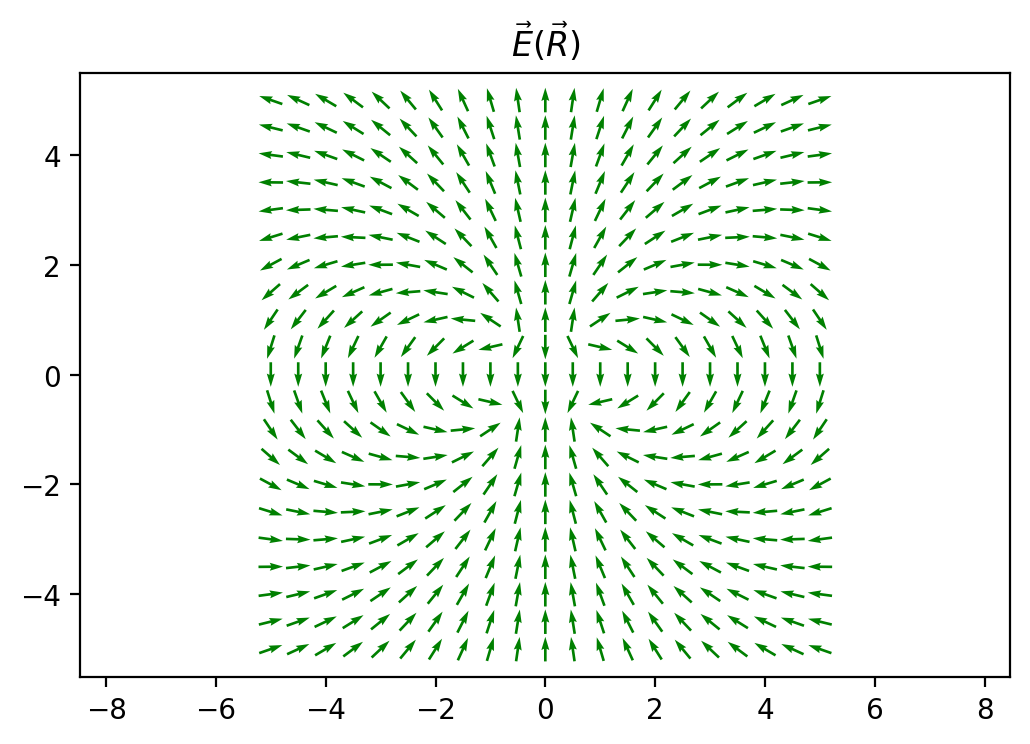

In [34]:
# (C) Two dipoles, pointing in the same direction, but separated.
q1 = +1
x1 = +0.5
y1 = +0.5

q2 = -1
x2 = +0.5
y2 = -0.5

q3 = +1
x3 = -0.5
y3 = +0.5

q4 = -1
x4 = -0.5
y4 = -0.5

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) \
        + np.stack(field_2d(q3, (x3,y3))) + np.stack(field_2d(q4, (x4,y4)))
draw_field_2d(X,Y,Ex,Ey)

Some of these fields are *dipole* fields and some are *quadrupole* fields.  Which are dipole fields?  Which are quadrupole?  How can you tell?  Where do you think the names come from?

Two dipoles, pointing directly at each other and Two dipoles, pointing in opposite directions, but separated are quadrupoles. You can by the four quadrant lines, all pointing in different directions and inducing a field around them. In the first, the center lines are pulling everything toward the middle, whereas in the second, where the dipoles are pointing in opposite directions, the arrows still point up/dn and L/R, but in different quadrants. This is likely also related to how they get their name. Each dipole, before it begane interacting with the other, already had two charges/poles, so the quadrupoles must accro as a result of whether the dipoles work together, or againts each other. 

# Further Exploration

Try at least one of the following.

## Tripole

We saw monopole, dipole, and quadrupole fields.  Can you create a tripole field?

Copy one of the field plotting cells below and tinker with the charges and locations.

What did you find?

## Streamlines

Refer to the streamlines example from the `visualizing-fields` notebook.  Adapt the code there to produce similar plots for (A) a dipole field and (B) a quadrupole field.

Which representation seems most useful to you?  Why?

## Coding Challenge: Slider

There is a thrid notebook in this folder: `slider-example.`  It illustrates how to add a slider to a plot — effectively an interactive animation.

Try to adapt this example to one of the plots you've created this week.  For example, you could ...

- Add a slider to a dipole plot that controls the separation of the charges.
- Add a slider to a heatmap of the potential that controls the z-coordinate of the slice.
- Implement your own idea for something cool!

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.widgets import Slider

In [41]:
# Define functions to calculate fields.
def coordinates(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    
    return X, Y, Z

def potential(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    V = q/R
    
    return V

def field(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    Ez = q*(Z-z0)/R**3
    
    return Ex, Ey, Ez

In [43]:
X, Y, Z = coordinates()
V = potential()
Ex, Ey, Ez = field()

In [37]:
%matplotlib notebook

<IPython.core.display.Javascript object>


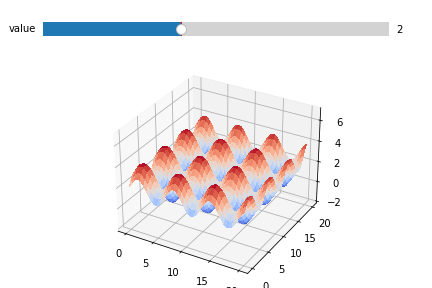

In [40]:
N = 201

X = np.linspace(0, 20, N)
Y = np.linspace(0, 20, N)
x, y = np.meshgrid(X, Y)
z = np.sin(x) + np.sin(y)


fig = plt.figure()

ax1 = fig.add_axes([0, 0, 1, 0.8], projection = '3d')
ax2 = fig.add_axes([0.1, 0.85, 0.8, 0.1])

s = Slider(ax = ax2, label = 'value', valmin = 0, valmax = 5, valinit = 2)

def update(val):
    value = s.val
    ax1.cla()
    ax1.plot_surface(x, y, z + value, cmap = cm.coolwarm, linewidth = 0, antialiased = False)
    ax1.set_zlim(-2, 7)

s.on_changed(update)
update(0)

plt.show()

I feel like the most I learned from this was how to add cells and change them from markdown to code, etc. which is super handy. I also think it's cool you can turn the interactive plot on and off. 